In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('Advertising.csv')

In [3]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# EDA

# Univarient analysis

<Axes: xlabel='TV', ylabel='Count'>

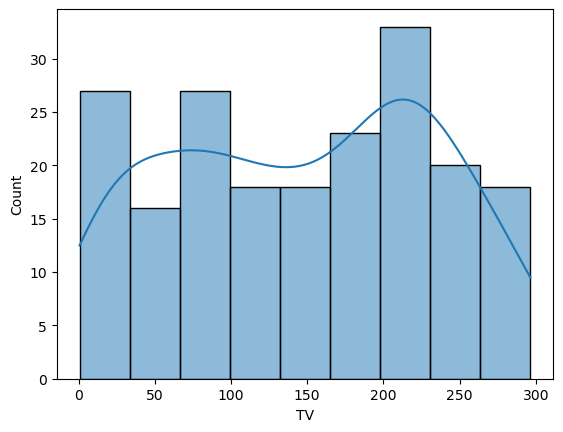

In [9]:
sns.histplot(x=data.TV,kde=True)

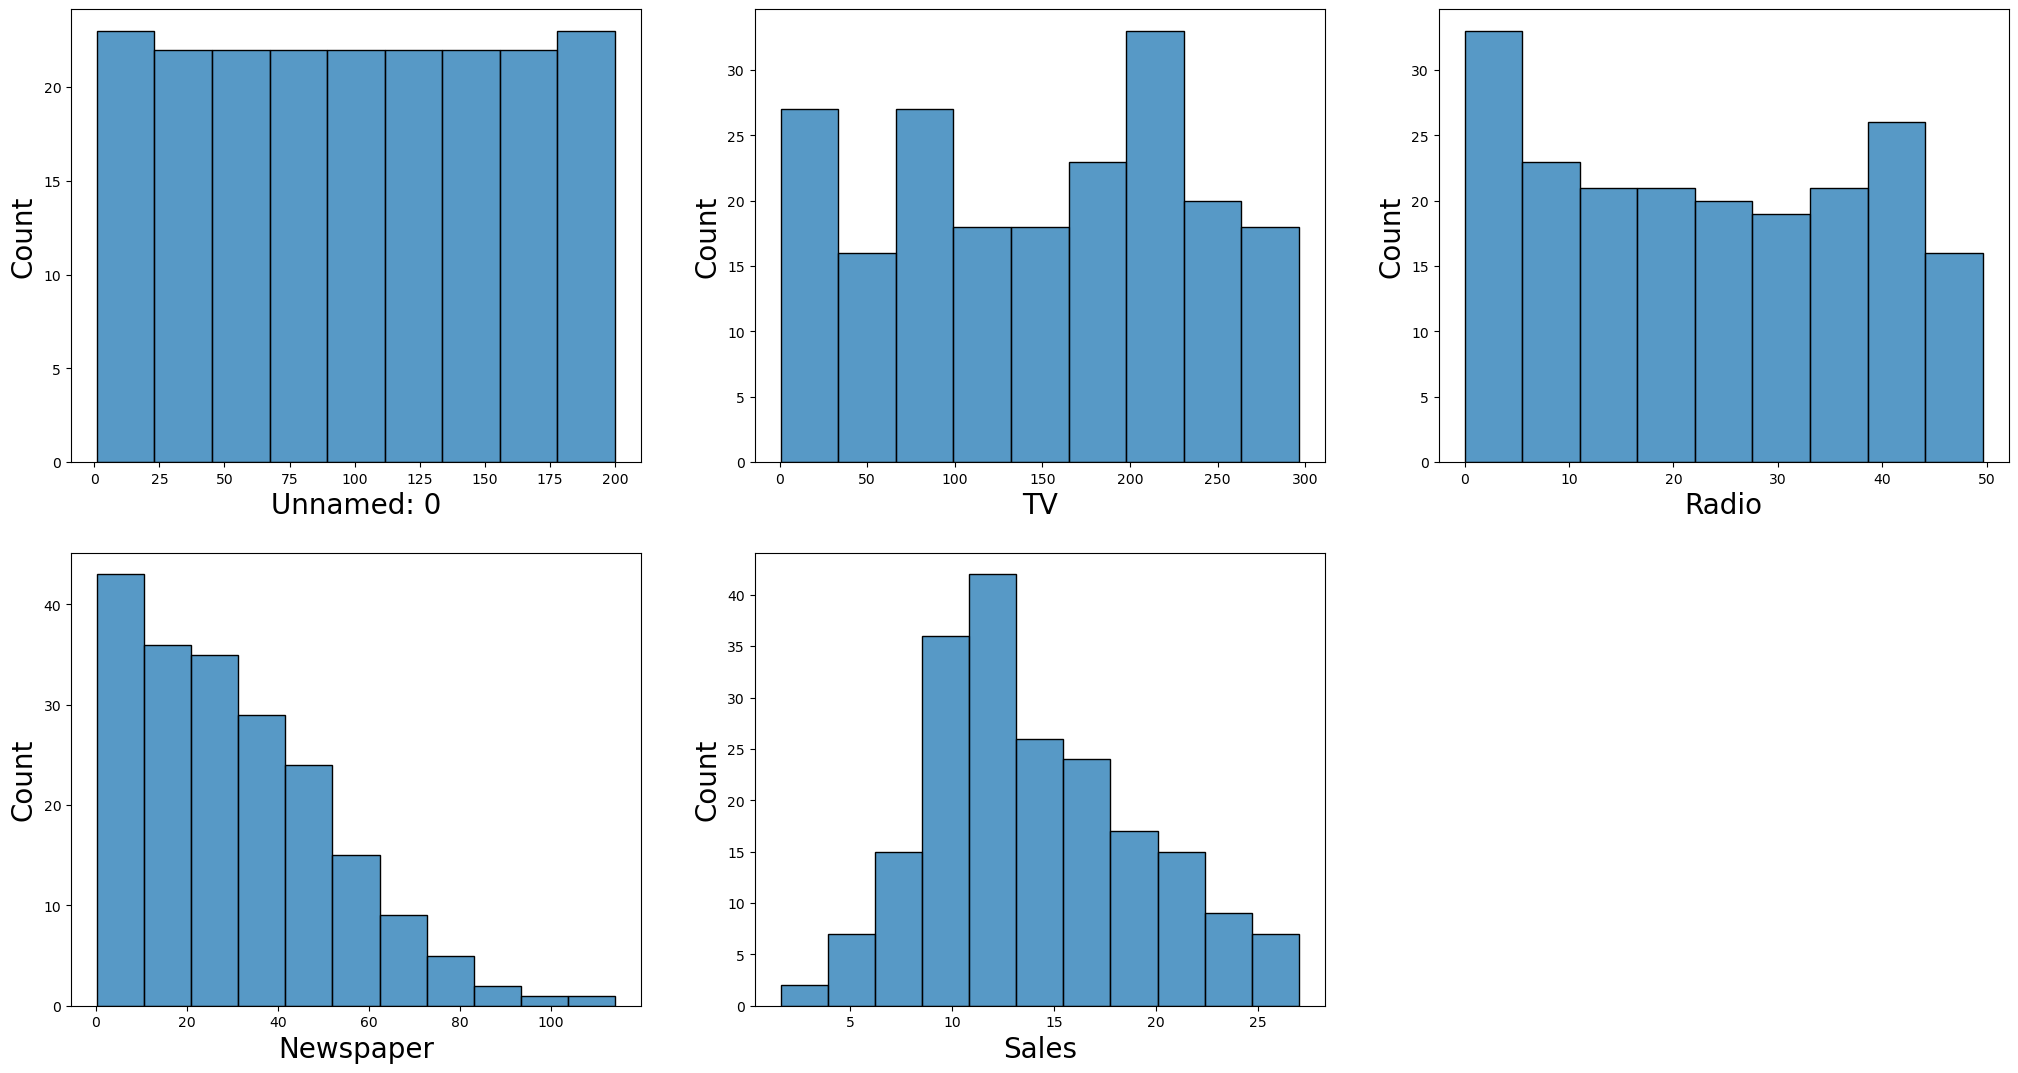

In [11]:
plt.figure(figsize=(25,20),facecolor='white')
plotnumber = 1
for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber +=1
plt.show()

# 2)Bivarient analysis

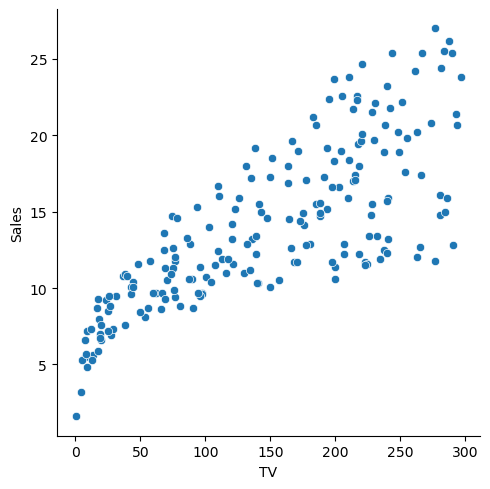

In [13]:
sns.relplot(x=data.TV ,y=data.Sales,data=data)

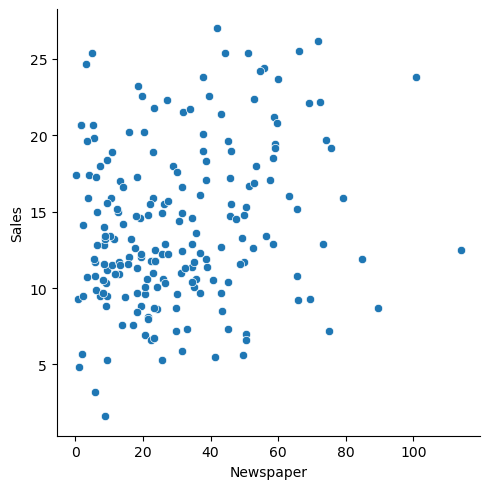

In [15]:
sns.relplot(x=data.Newspaper ,y=data.Sales,data=data)

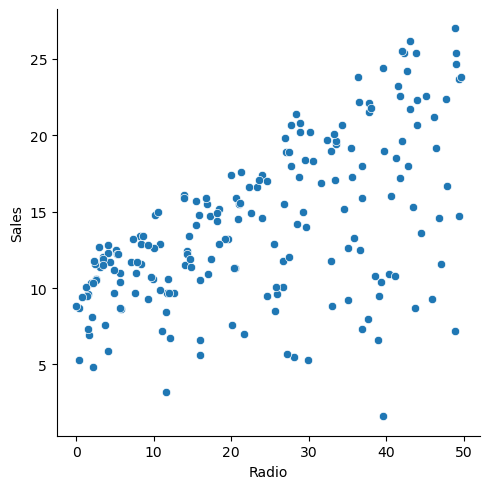

In [16]:
sns.relplot(x=data.Radio ,y=data.Sales,data=data)

# Data preprocissing

In [17]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

<Axes: xlabel='TV'>

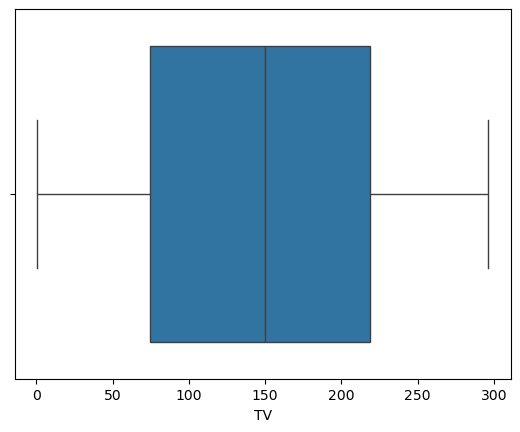

In [18]:
sns.boxplot(x='TV',data=data)

<Axes: xlabel='Newspaper'>

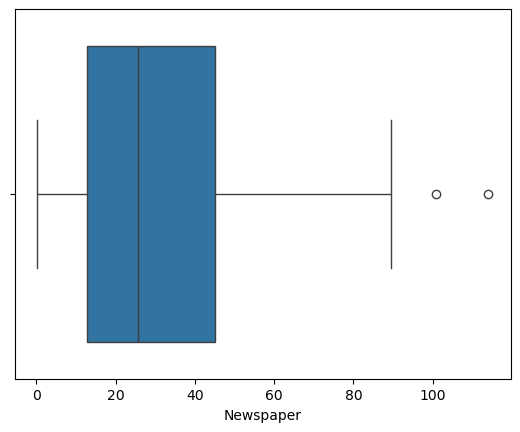

In [19]:
sns.boxplot(x='Newspaper',data=data)

<Axes: xlabel='Radio'>

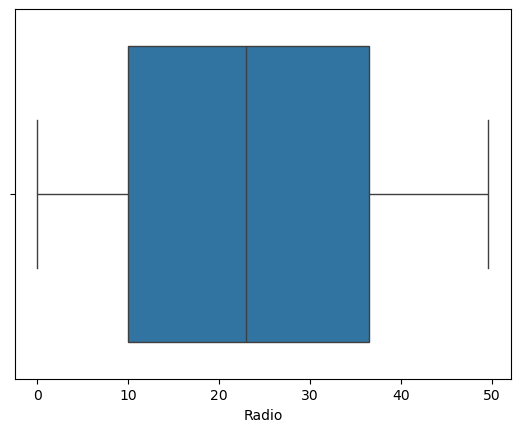

In [20]:
sns.boxplot(x='Radio',data=data)

# feature selection

In [21]:
l1=['Unnamed: 0']
data.drop(l1,axis=1,inplace=True)

<Axes: >

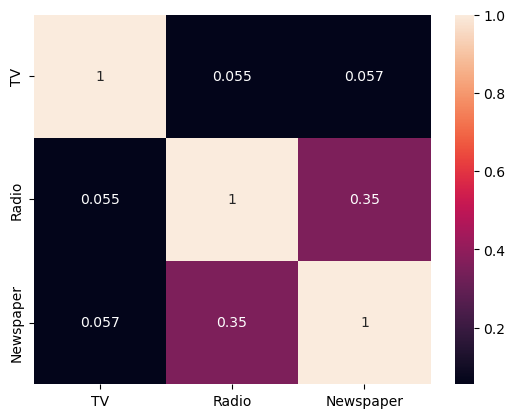

In [22]:
sns.heatmap(data.drop('Sales',axis=1).corr(),annot=True)

# Model Creation

In [25]:
X = data[['TV','Radio','Newspaper']]
y = data.Sales

In [26]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [27]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=8)

In [62]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_predict=lr.predict(X_test)

In [63]:
y_predict

array([12.1621681 , 21.06478289, 18.51830935, 13.5045794 ,  8.02752064,
       11.6334744 , 22.25397982,  6.92206398, 14.03418589,  6.74517528,
       18.07445623, 15.43936529, 19.21914008, 10.05970639, 12.53365301,
       12.28557909, 17.12266381, 18.40723065, 20.39183906, 14.85068572,
       21.67261666, 10.47513658, 16.60889838,  9.88613131, 19.70218023,
       13.92705225, 20.00325895, 20.77556454, 15.29595289,  8.89599926,
        7.52077087, 15.04990973, 12.11476536, 15.73895563, 23.6201299 ,
       19.0368081 , 17.48957926, 20.59495111, 13.87394025, 16.54750829])

# Model Evaluation

In [64]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

r2_score=r2_score(y_test,y_predict)
r2_score

0.8460595754263388

In [65]:
import math
print(mean_squared_error(y_test,y_predict))
print(math.sqrt(mean_squared_error(y_test,y_predict)))

4.31789036290908
2.0779534072998556


In [66]:
print(mean_absolute_error(y_test,y_predict))

1.462713534355394
